# 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)

## 벡터, 행렬, 텐서 그림으로 이해하기

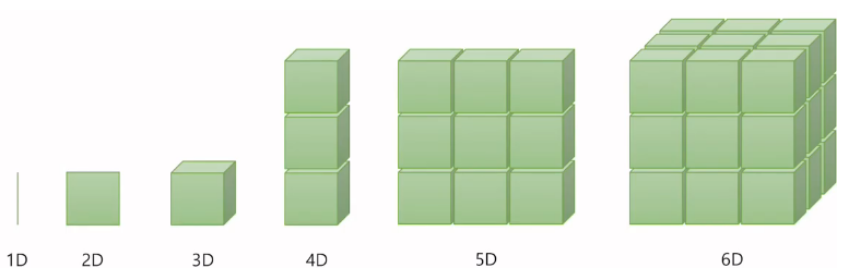

0차원: 스카라  
1차원: 벡터  
2차원: 행렬(Matrix)  
3차원: 텐서(Tensor)  

데이터사이언스 분야 한정으로 3차원 이상의 텐서는 그냥 다차원 행렬 또는 배열로 간주할 수 있습니다. 또한 주로 3차원 이상을 텐서라고 하긴 하지만, 1차원 벡터나 2차원인 행렬도 텐서라고 표현하기도 합니다. 같은 표현입니다. 벡터 = 1차원 텐서, 2차원 행렬 = 2차원 텐서. 그리고 3차원 텐서, 4차원 텐서, 5차원 텐서 등...

## PyTorch Tensor Shape Convention

2D Tensor: (Batch size, dim)  

훈련 데이터 하나의 크기를 256이라고 해봅시다. [3, 1, 2, 5, ...] 이런 숫자들의 나열이 256의 길이로 있다고 상상하면됩니다. 다시 말해 훈련 데이터 하나 = 벡터의 차원은 256입니다. 만약 이런 훈련 데이터의 개수가 3000개라고 한다면, 현재 전체 훈련 데이터의 크기는 3,000 × 256입니다. 행렬이니까 2D 텐서네요. 3,000개를 1개씩 꺼내서 처리하는 것도 가능하지만 컴퓨터는 훈련 데이터를 하나씩 처리하는 것보다 보통 덩어리로 처리합니다. 3,000개에서 64개씩 꺼내서 처리한다고 한다면 이 때 batch size를 64라고 합니다. 그렇다면 컴퓨터가 한 번에 처리하는 2D 텐서의 크기는 (batch size × dim) = 64 × 256입니다.

3D Tensor: (batch size, width, height)

자연어 처리는 보통 (batch size, 문장 길이, 단어 벡터의 차원)이라는 3차원 텐서를 사용합니다.  
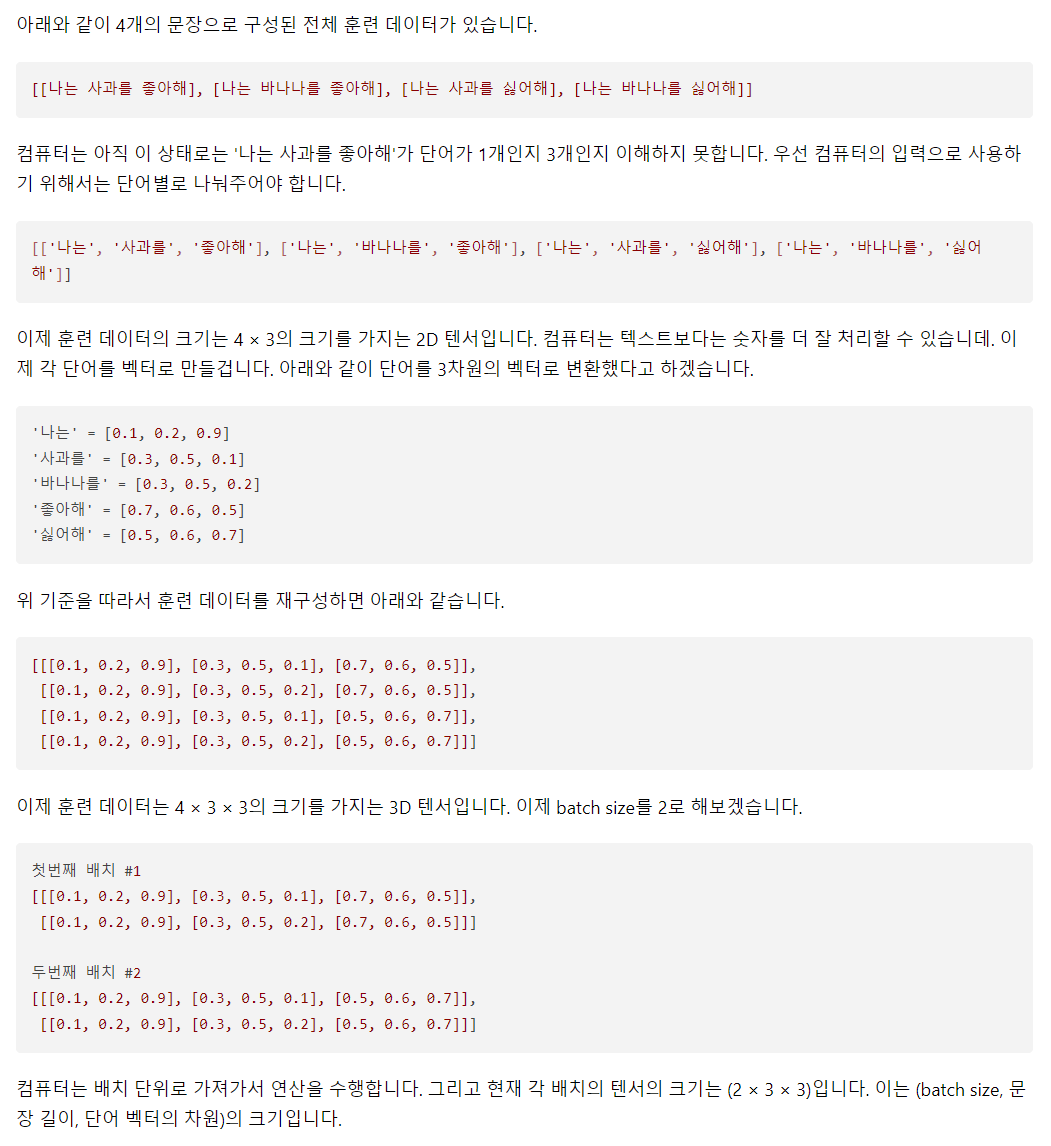

# 넘파이로 텐서 만들기(벡터와 행렬 만들기)

In [1]:
import numpy as np

## 1D with Numpy

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
# 파이썬으로 설명하면 List를 생성해서 np.array로 1차원 array로 변환함.
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank of t: ', t.ndim) # 차원
print('Shape of t: ', t.shape) # 크기

Rank of t:  1
Shape of t:  (7,)


In [4]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # 인덱스를 통한 원소 접근

t[0] t[1] t[-1] =  0.0 1.0 6.0


In [5]:
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1]) # [시작 번호 : 끝 번호]로 범위 지정을 통해 가져온다.

t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]


In [6]:
print('t[:2] t[3:]     = ', t[:2], t[3:]) # 시작 번호를 생략한 경우와 끝 번호를 생략한 경우

t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


## 2D with Numpy

In [7]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [8]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


## 파이토치 텐서 선언하기(PyTorch Tensor Allocation)

In [9]:
import torch

## 1D with PyTorch

In [10]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [11]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [12]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


## 2D with PyTorch

In [13]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [14]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [15]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [16]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## 브로드캐스팅(Broadcasting)

브로드캐스팅은 편리하지만, 자동으로 실행되는 기능이므로 사용자 입장에서 굉장히 주의해서 사용해야 합니다.

In [17]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [18]:
# Vector + Scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [19]:
# 1 x 2 Vector + 2 x 1 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


## 자주 사용되는 기능들

### 행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)

In [20]:
# 행렬곱
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [21]:
# element-wise 곱셈
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


### 평균(Mean)

In [22]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [23]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [24]:
print(t.mean())

tensor(2.5000)


In [25]:
print(t.mean(dim=0)) # 인자로 dim을 준다면 해당 차원을 제거(즉, 행 제거 후 열만 남기기)

tensor([2., 3.])


In [26]:
print(t.mean(dim=1)) # 열 제거 후 행만 남기기

tensor([1.5000, 3.5000])


In [27]:
print(t.mean(dim=-1)) # 마지막 차원 제거

tensor([1.5000, 3.5000])


### 덧셈(Sum)

In [28]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [29]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


### 최대(Max)와 아그맥스(ArgMax)


In [30]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [31]:
print(t.max())

tensor(4.)


In [32]:
print(t.max(dim=0)) # max에 dim 인자를 주면 argmax도 함께 리턴

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [33]:
print('Max: ', t.max(dim=0)[0]) # max 리턴
print('Argmax: ', t.max(dim=0)[1]) # argmax 리턴

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [34]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


### 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요!

view(), squeeze(), unsqueeze()는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절합니다.

- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.
- 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

In [35]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])


In [36]:
print(ft.shape)

torch.Size([2, 2, 3])


In [37]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경((2, 2, 3) -> (2 × 2, 3) -> (4, 3))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [38]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


###  스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [39]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [40]:
print(ft.squeeze()) # (3 × 1) 2차원 텐서 -> (3,) 1차원 벡터
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [41]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [42]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미
print(ft.unsqueeze(0).shape) #  (3,) 1차원 벡터 -> (1, 3) 2차원 텐서

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [43]:
# view로도 구현 가능
print(ft.view(1, -1)) # 2차원으로 바꾸고 싶으면서 첫번째 차원은 1이기를 원함
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [44]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [45]:
print(ft.unsqueeze(-1)) # -1은 인덱스 상으로 마지막 차원 의미
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 타입 캐스팅(Type Casting)

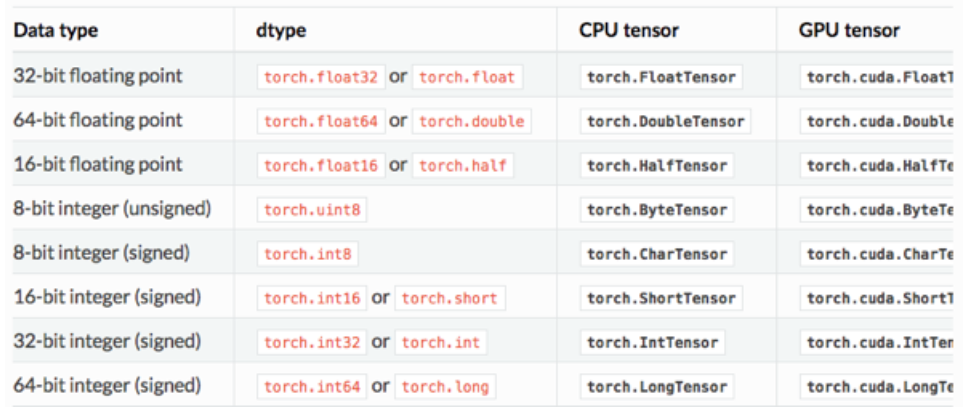

In [46]:
lt = torch.LongTensor([1, 2, 3, 4]) # long형 텐서
print(lt)

tensor([1, 2, 3, 4])


In [47]:
print(lt.float()) # float형으로 변경

tensor([1., 2., 3., 4.])


In [48]:
bt = torch.ByteTensor([True, False, False, True]) # byte형 텐서
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [49]:
print(bt.long()) # long형으로 변경
print(bt.float()) # float형으로 변경

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 연결하기(concatenate)

두 텐서를 연결(두 가지의 정보를 모두 사용)하면서 어느 차원을 늘릴 것인지 결정합니다.

In [50]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [51]:
print(torch.cat([x, y], dim=0)) # (2x2) -> (4x2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [52]:
print(torch.cat([x, y], dim=1)) # (2x2) -> (2x4)

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 스택킹(Stacking)

연결(concatenate)을 하는 또 다른 방법으로 많은 연산을 한 번에 축약하고 있습니다.

In [53]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [54]:
print(torch.stack([x, y, z])) # (2,) 3개 스택 -> (3,2)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [55]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0)) # 위의 stack 연산은 이 코드와 동일한 작업

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [56]:
print(torch.stack([x, y, z], dim=1)) # (2,) 3개 dim=1로(두번째 차원 증가) 스택 -> (2,3)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [57]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [58]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [59]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### In-place Operation (덮어쓰기 연산)

In [60]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [61]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [62]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
